# **Capitulo 5 – Decision Trees. End to End**

### Librerias

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

Los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [99]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y creemos la carpeta `images/decision_trees` (si no existe ya), y definamos la función `save_fig()` que se utiliza a través de este Notebook para guardar las figuras:

In [100]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "decision_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargamos datos

In [129]:
import pandas as pd
penguins = pd.read_csv("data/penguins_size.csv")

# Preprocesamiento

In [130]:
# analisis de variables
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [131]:
# borrar missing
penguins = penguins.dropna()

In [104]:
# tratar variables categorias
# species, island y sex
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [105]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [106]:
# Species
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
species = ordinal_encoder.fit_transform(penguins[["species"]])

In [107]:
penguins["target"] = species 

In [108]:
penguins.groupby(["species", "target"], as_index=False)["sex"].count()

,species,target,sex
0,Adelie,0.0,146
1,Chinstrap,1.0,68
2,Gentoo,2.0,120


In [109]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [110]:
# Island
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
island = cat_encoder.fit_transform(penguins[["island"]])


In [111]:
island

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [112]:
cat_encoder.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]

In [113]:
# Donde están los nombres de las categorias? Qué tipo de datos son?
isl = pd.DataFrame(island)
isl.columns = list(cat_encoder.categories_[0])


In [114]:
penguins = pd.merge(penguins, isl, left_index=True, right_index=True)

In [116]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.0,0.0,0.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.0,0.0,0.0,1.0


In [117]:
# Sex
sex = cat_encoder.fit_transform(penguins[["sex"]])

In [118]:
sex = pd.DataFrame(sex)
sex.columns = list(cat_encoder.categories_[0])

In [119]:
penguins = pd.merge(penguins, sex, left_index=True, right_index=True)

In [121]:
penguins.drop(columns=["species", "island", "sex"], inplace=True)

In [122]:
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target,Biscoe,Dream,Torgersen,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
319,51.1,16.5,225.0,5250.0,2.0,1.0,0.0,0.0,1.0,0.0
320,48.5,15.0,219.0,4850.0,2.0,1.0,0.0,0.0,0.0,1.0
321,55.9,17.0,228.0,5600.0,2.0,1.0,0.0,0.0,1.0,0.0
322,47.2,15.5,215.0,4975.0,2.0,1.0,0.0,0.0,0.0,1.0


In [133]:
import pandas as pd
penguins = pd.read_csv("data/penguins_size.csv")

In [134]:
penguins = penguins.dropna()

In [135]:
penguins["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [136]:
penguins = penguins[penguins["sex"]!="."]

In [137]:
# Vamos a utilizar una pipeline para hacerlo todo
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer(transformers=[
        ("ord", OrdinalEncoder(), ['species']),
        ("one", OneHotEncoder(), ['sex', "island"]),
    ])

penguins_prepared = full_pipeline.fit_transform(penguins)

In [138]:
penguins_prepared

array([[0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [2., 0., 1., 1., 0., 0.],
       [2., 1., 0., 1., 0., 0.],
       [2., 0., 1., 1., 0., 0.]])

In [142]:
# ¿Cómo obtenemos los nombres de las columnas?
full_pipeline.named_transformers_['ord'].categories_[0]


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [143]:
target = list(full_pipeline.named_transformers_['ord'].categories_[0])

In [144]:
target

['Adelie', 'Chinstrap', 'Gentoo']

In [145]:
full_pipeline.named_transformers_['one'].categories_[0]

array(['FEMALE', 'MALE'], dtype=object)

In [146]:
full_pipeline.named_transformers_['one'].categories_[1]

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [147]:
penguins_prepared

array([[0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [2., 0., 1., 1., 0., 0.],
       [2., 1., 0., 1., 0., 0.],
       [2., 0., 1., 1., 0., 0.]])

In [150]:
names = ["target"] + list(full_pipeline.named_transformers_['one'].categories_[0]) + list(full_pipeline.named_transformers_['one'].categories_[1])
names

['target', 'FEMALE', 'MALE', 'Biscoe', 'Dream', 'Torgersen']

In [168]:
names = [x  for y  in range(len(full_pipeline.named_transformers_['one'].categories_)) for x in list(full_pipeline.named_transformers_['one'].categories_[y])]

In [169]:
names = ["target"] + names

In [170]:
names

['target', 'FEMALE', 'MALE', 'Biscoe', 'Dream', 'Torgersen']

In [171]:
# convertir en dataframe
pipe = pd.DataFrame(penguins_prepared, columns=names)

In [173]:
# Comprobar pipe y penguins contienen la misma información
pipe["FEMALE"].sum()

165.0

In [174]:
penguins.groupby("sex")["sex"].count()

sex
FEMALE    165
MALE      168
Name: sex, dtype: int64

In [180]:
# Borrar las columnas originales del dataset
penguins.drop(["island", "sex", "species"], axis=1, inplace=True, errors="ignore")

In [183]:
# merge
penguins_pre = pd.merge(penguins, pipe, right_index=True, left_index=True)

In [185]:
penguins_pre

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target,FEMALE,MALE,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,0.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
328,43.3,14.0,208.0,4575.0,2.0,1.0,0.0,1.0,0.0,0.0
329,48.1,15.1,209.0,5500.0,2.0,1.0,0.0,1.0,0.0,0.0
330,50.5,15.2,216.0,5000.0,2.0,0.0,1.0,1.0,0.0,0.0
331,49.8,15.9,229.0,5950.0,2.0,1.0,0.0,1.0,0.0,0.0


In [186]:
# lo guardamos 
penguins_pre.to_csv("data/penguins_pre.csv", index=False)

In [189]:
# Divisón las features de predicción y la columna a predecir
X = penguins_pre.drop("target", axis =1)
y = penguins_pre["target"]

In [190]:
y

0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
328    2.0
329    2.0
330    2.0
331    2.0
332    2.0
Name: target, Length: 324, dtype: float64

In [191]:
# División train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Creamos y entrenamos el modelo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [193]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "penguins.dot"),
        feature_names=X_train.columns,
        class_names=target,
        rounded=True,
        filled=True
    )

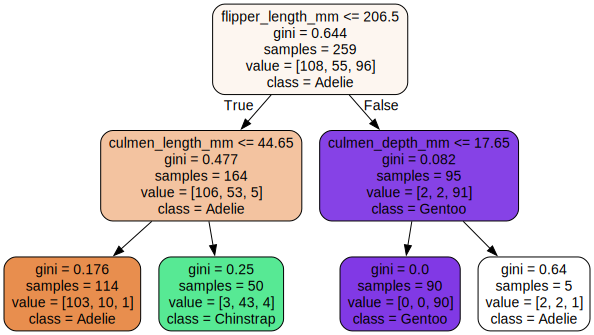

In [194]:
from graphviz import Source

Source.from_file("images/decision_trees/penguins.dot")

In [195]:
accuracy_score(y_train, tree_clf.predict(X_train))


0.918918918918919

In [ ]:
# Calcular a mano
1-(21/259)

0.9189189189189189

In [199]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report


In [200]:
multilabel_confusion_matrix(y_train, tree_clf.predict(X_train))

array([[[137,  14],
        [  3, 105]],

       [[197,   7],
        [ 12,  43]],

       [[163,   0],
        [  6,  90]]], dtype=int64)

In [201]:
results = classification_report(y_train, tree_clf.predict(X_train), target_names=target, output_dict=True)


In [202]:
results["Adelie"]

{'precision': 0.8823529411764706,
 'recall': 0.9722222222222222,
 'f1-score': 0.9251101321585903,
 'support': 108.0}

In [ ]:
results["Chinstrap"]

{'precision': 0.86,
 'recall': 0.7818181818181819,
 'f1-score': 0.819047619047619,
 'support': 55.0}

In [ ]:
results["Gentoo"]

{'precision': 1.0,
 'recall': 0.9375,
 'f1-score': 0.967741935483871,
 'support': 96.0}

In [204]:
# Train vs test
print(accuracy_score(y_train, tree_clf.predict(X_train)))
print(accuracy_score(y_test, tree_clf.predict(X_test)))

0.918918918918919
0.9538461538461539


In [205]:
# Suerte?  Misma distribución train test? 
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,43.927027,17.164093,200.675676,4182.722008,0.498069,0.501931,0.501931,0.382239,0.115830
std,5.342477,1.916570,14.071352,817.453282,0.500964,0.500964,0.500964,0.486875,0.320641
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.550000,15.700000,190.000000,3550.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.400000,17.300000,197.000000,3975.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,48.450000,18.600000,213.500000,4762.500000,1.000000,1.000000,1.000000,1.000000,0.000000
max,59.600000,21.500000,231.000000,6050.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
X_test.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,43.560000,17.433846,199.569231,4150.384615,0.492308,0.507692,0.446154,0.369231,0.184615
std,5.927262,2.141646,12.823281,675.021590,0.503831,0.503831,0.500961,0.486352,0.391005
min,34.600000,13.500000,176.000000,3200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.200000,15.600000,190.000000,3600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.900000,17.900000,196.000000,4000.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,19.000000,210.000000,4600.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,55.900000,21.100000,228.000000,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
pd.DataFrame(y_train).value_counts(normalize=True)

target
0.0       0.416988
2.0       0.370656
1.0       0.212355
Name: proportion, dtype: float64

In [209]:
pd.DataFrame(y_test).value_counts(normalize=True)

target
0.0       0.492308
2.0       0.307692
1.0       0.200000
Name: proportion, dtype: float64

In [210]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    strat_train_set = X.iloc[train_index]
    strat_train_y_set = y.iloc[train_index]
    strat_test_set = X.iloc[test_index]
    strat_test_y_set = y.iloc[test_index]

In [213]:
# Sobre loc y iloc
print(X.head())
# Si está ordenado el indice
print("*"*100)
print(X.loc[0])
print("*"*100)
print(X.iloc[0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  FEMALE  \
0              39.1             18.7              181.0       3750.0     0.0   
1              39.5             17.4              186.0       3800.0     1.0   
2              40.3             18.0              195.0       3250.0     1.0   
4              36.7             19.3              193.0       3450.0     0.0   
5              39.3             20.6              190.0       3650.0     1.0   

   MALE  Biscoe  Dream  Torgersen  
0   1.0     0.0    0.0        1.0  
1   0.0     0.0    0.0        1.0  
2   0.0     0.0    0.0        1.0  
4   1.0     0.0    0.0        1.0  
5   0.0     0.0    0.0        1.0  
****************************************************************************************************
culmen_length_mm       39.1
culmen_depth_mm        18.7
flipper_length_mm     181.0
body_mass_g          3750.0
FEMALE                  0.0
MALE                    1.0
Biscoe                  0.0
Dream 

In [214]:
# Sobre loc y iloc
# Si NO está ordenado el indice
X_ = X.sample(frac=1, random_state=42)
print(X_.head())
print("*"*100)
print(X_.loc[0])
print("*"*100)
print(X_.iloc[0])

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
138              37.0             16.5              185.0       3400.0   
114              39.6             20.7              191.0       3900.0   
143              40.7             17.0              190.0       3725.0   
14               34.6             21.1              198.0       4400.0   
186              49.7             18.6              195.0       3600.0   

     FEMALE  MALE  Biscoe  Dream  Torgersen  
138     1.0   0.0     0.0    1.0        0.0  
114     1.0   0.0     0.0    0.0        1.0  
143     0.0   1.0     0.0    1.0        0.0  
14      0.0   1.0     0.0    0.0        1.0  
186     0.0   1.0     0.0    1.0        0.0  
****************************************************************************************************
culmen_length_mm       39.1
culmen_depth_mm        18.7
flipper_length_mm     181.0
body_mass_g          3750.0
FEMALE                  0.0
MALE                    1.0
Biscoe    

In [217]:
pd.DataFrame(strat_test_y_set).value_counts(normalize=True)

target
0.0       0.430769
2.0       0.353846
1.0       0.215385
Name: proportion, dtype: float64

In [218]:
pd.DataFrame(strat_train_y_set).value_counts(normalize=True)

target
0.0       0.432432
2.0       0.359073
1.0       0.208494
Name: proportion, dtype: float64

In [219]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(strat_train_set, strat_train_y_set)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 5, 10, 15, 20]},
                   random_state=42, scoring='accuracy')

In [220]:
# Mejores parámetros del modelo
random_search.best_params_

{'min_samples_leaf': 1, 'max_depth': 5}

In [221]:
# Mejor score (accuracy)
random_search.best_score_

0.9496229260935143

In [222]:
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 1, max_depth = 5)
tree.fit(strat_train_set, strat_train_y_set)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [224]:
len(strat_train_set)

259

In [223]:
print(accuracy_score(strat_train_y_set, tree.predict(strat_train_set)))

0.9845559845559846


In [232]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 1, max_depth = 5)

cv = cross_val_score(tree, strat_train_set, strat_train_y_set, scoring="accuracy")

cv.mean()

0.9496229260935143

In [233]:
cv

array([0.94230769, 0.94230769, 0.98076923, 0.98076923, 0.90196078])

In [234]:

print(random_search.best_score_)

0.9496229260935143


In [240]:
# Overfit?
print(random_search.best_score_)
print(accuracy_score(strat_test_y_set, random_search.predict(strat_test_set)))

0.9496229260935143
0.8769230769230769


In [243]:
len(strat_test_y_set)*random_search.best_score_

61.725490196078425

In [244]:
len(strat_test_y_set)*accuracy_score(strat_test_y_set, random_search.predict(strat_test_set))

57.0

In [316]:
from sklearn.model_selection import RandomizedSearchCV
# Y si no fijo la semilla aquí??
tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(strat_train_set, strat_train_y_set)
print(random_search.best_params_)
print(random_search.best_score_)

{'min_samples_leaf': 1, 'max_depth': 5}
0.9380090497737557
